In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,-0.870635
1,2016-01-26,0.951762
2,2016-01-27,2.285937
3,2016-01-28,3.582260
4,2016-01-29,3.085772
5,2016-01-30,5.518716
6,2016-01-31,4.474009
7,2016-02-01,7.780780
8,2016-02-02,7.429573
9,2016-02-03,9.298334


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,19.106093
349,2017-01-08,20.896310
350,2017-01-09,22.297185
351,2017-01-10,22.450376
352,2017-01-11,23.943530
353,2017-01-12,24.033267
354,2017-01-13,26.744537
355,2017-01-14,27.757442
356,2017-01-15,28.483932
357,2017-01-16,7.236476


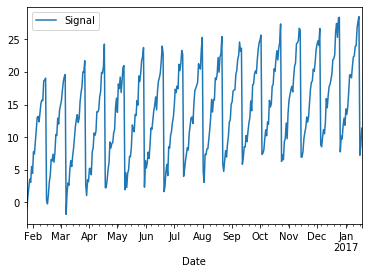

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 3.4868886470794678
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Length=360  Min=-1.8166907883271852 Max=28.483931937748174  Mean=13.930487319531547 StdDev=6.838330205212032
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=-1.8166907883271852 Max=28.483931937748174  Mean=13.930487319531547 StdDev=6.838330205212032
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.3545963764190674


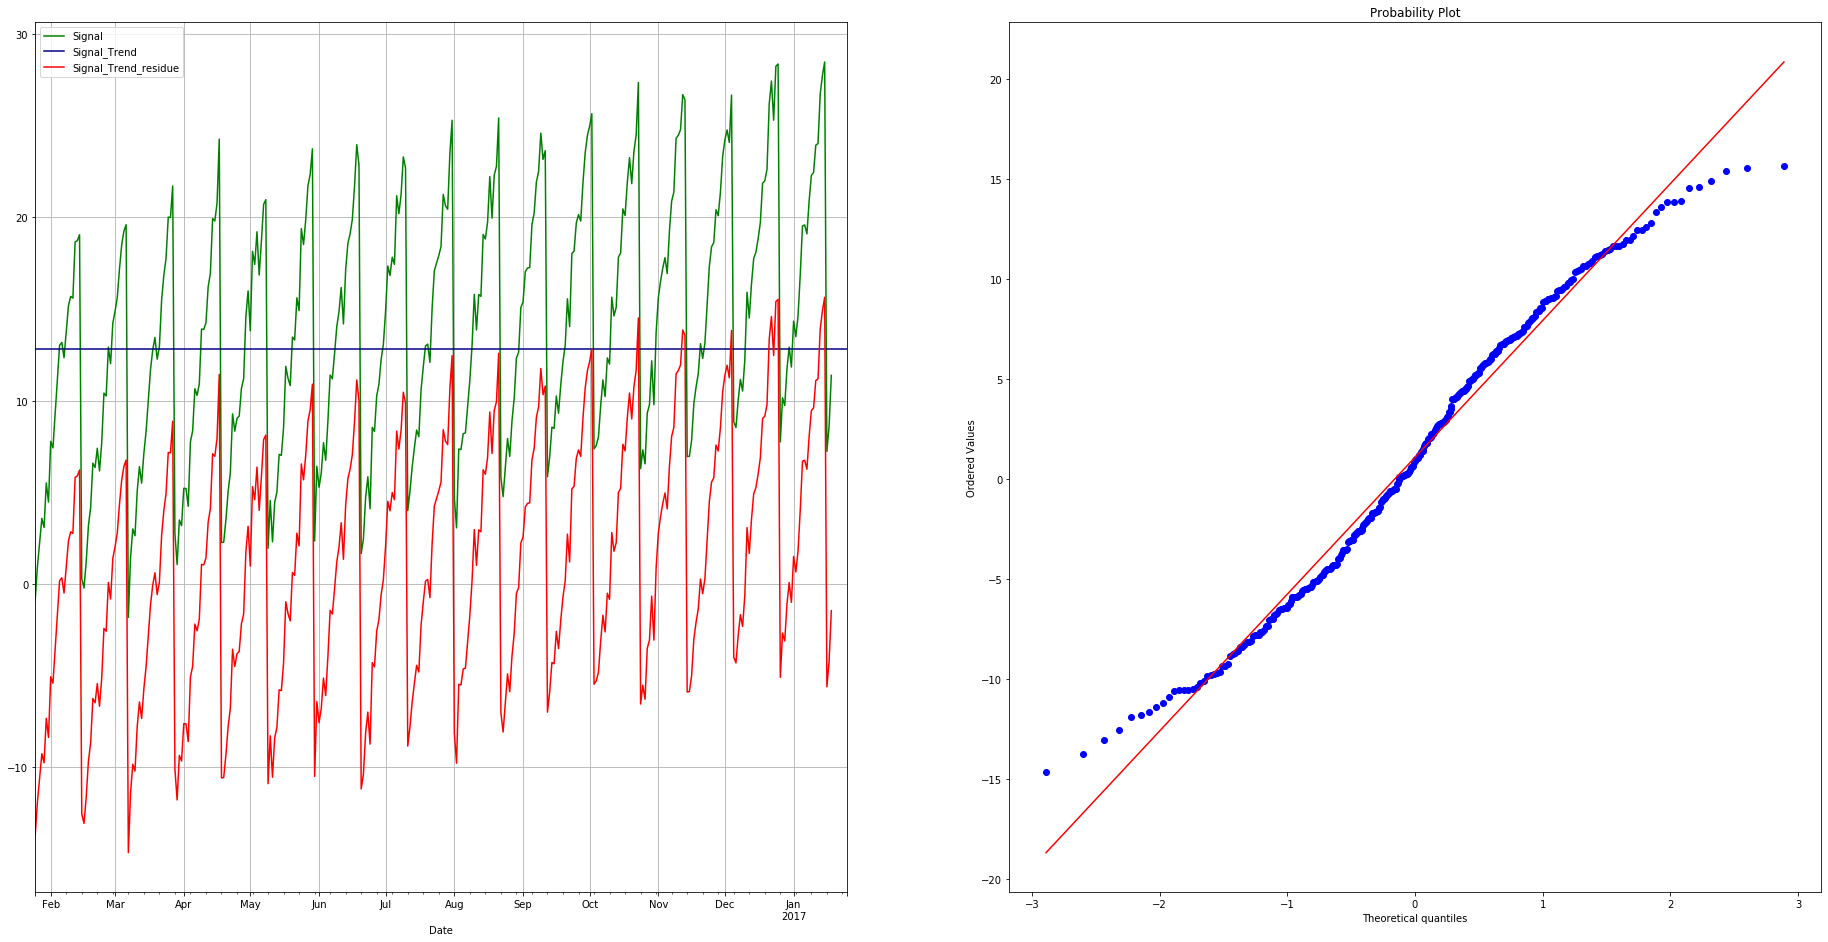

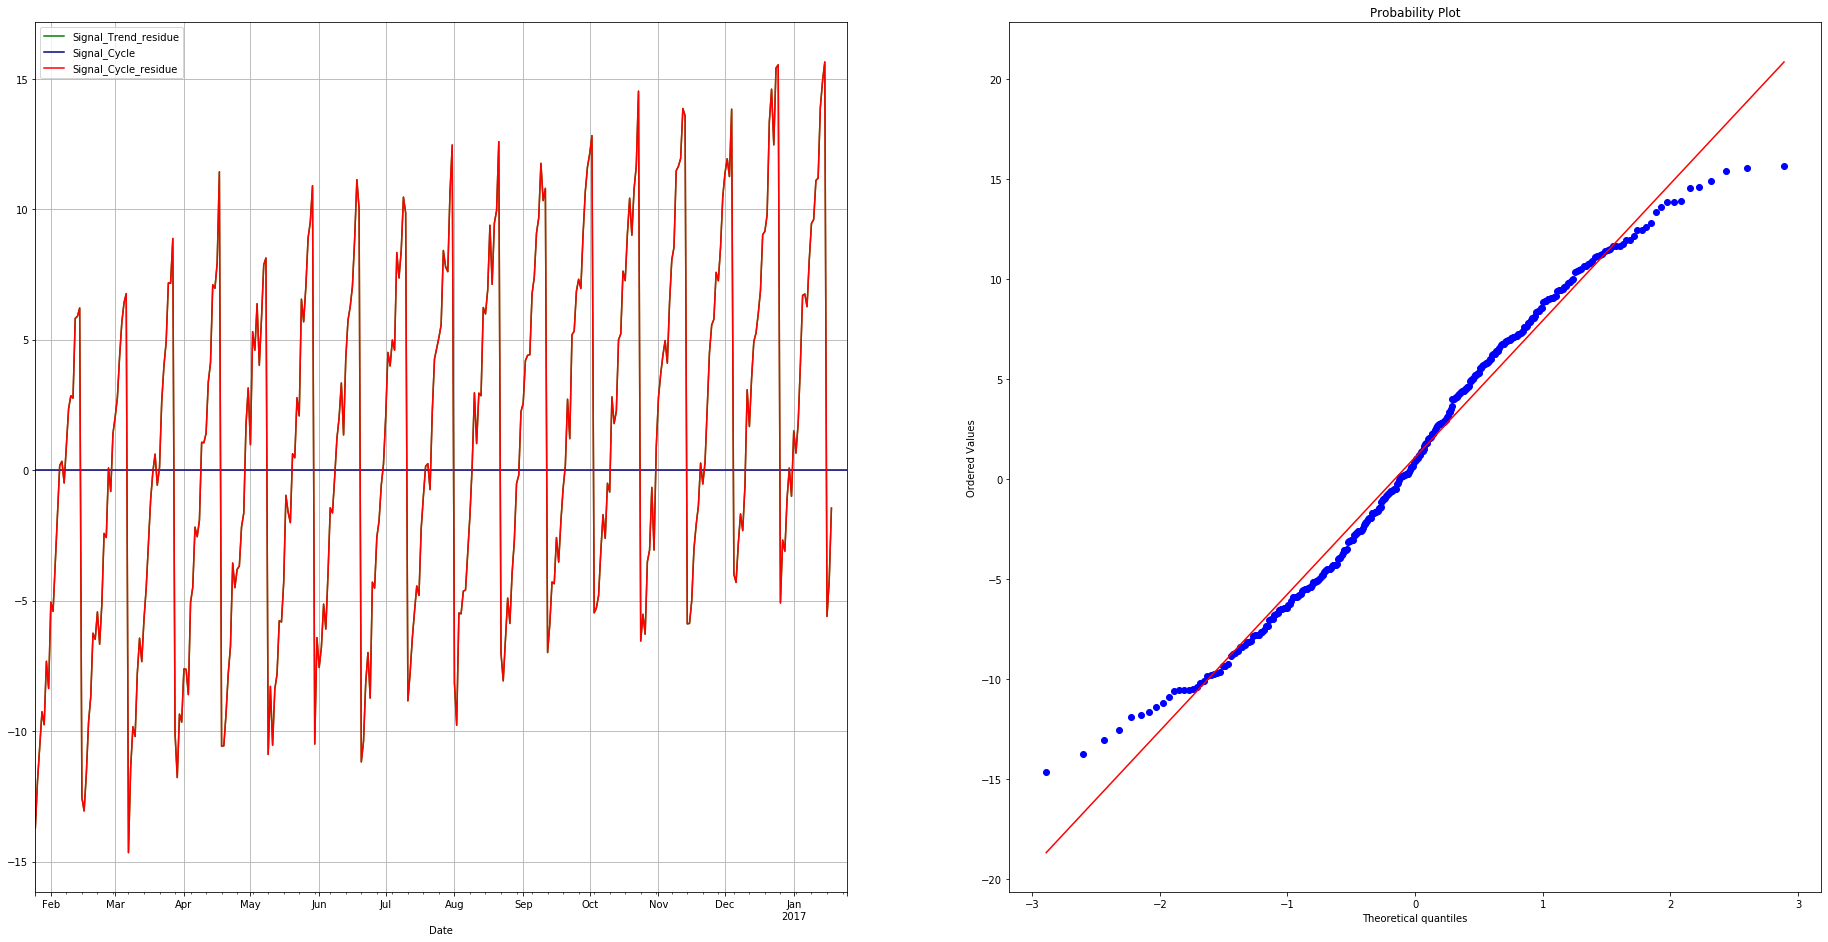

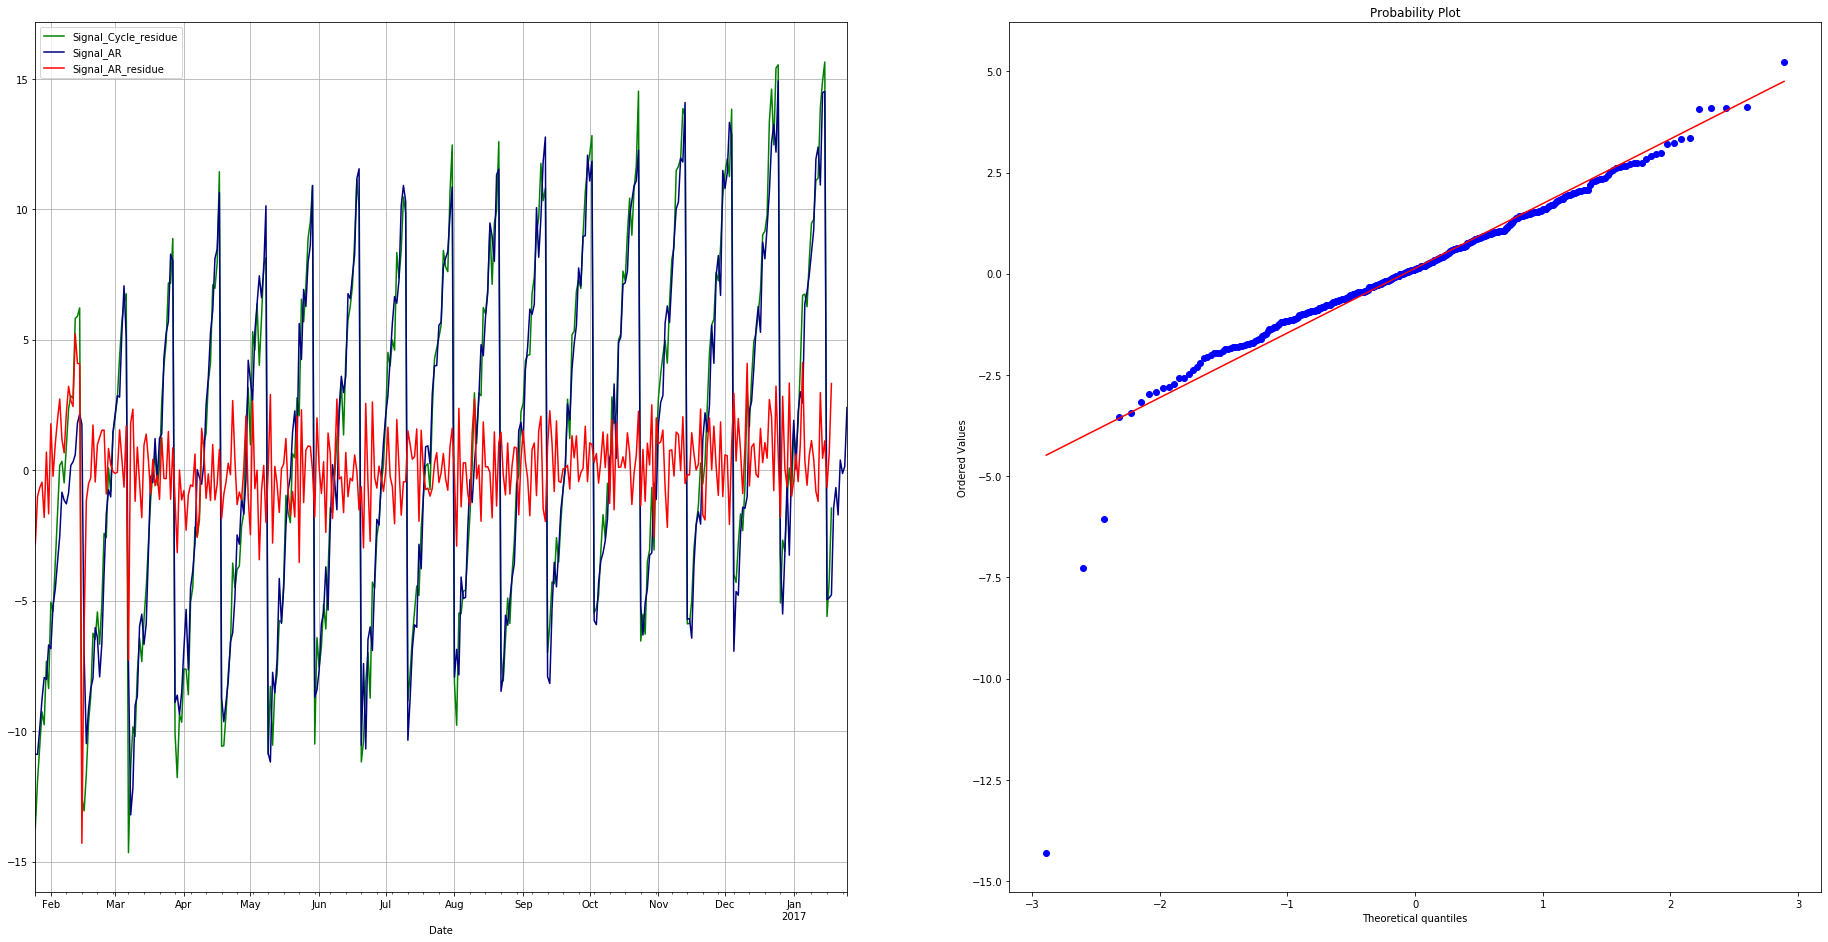

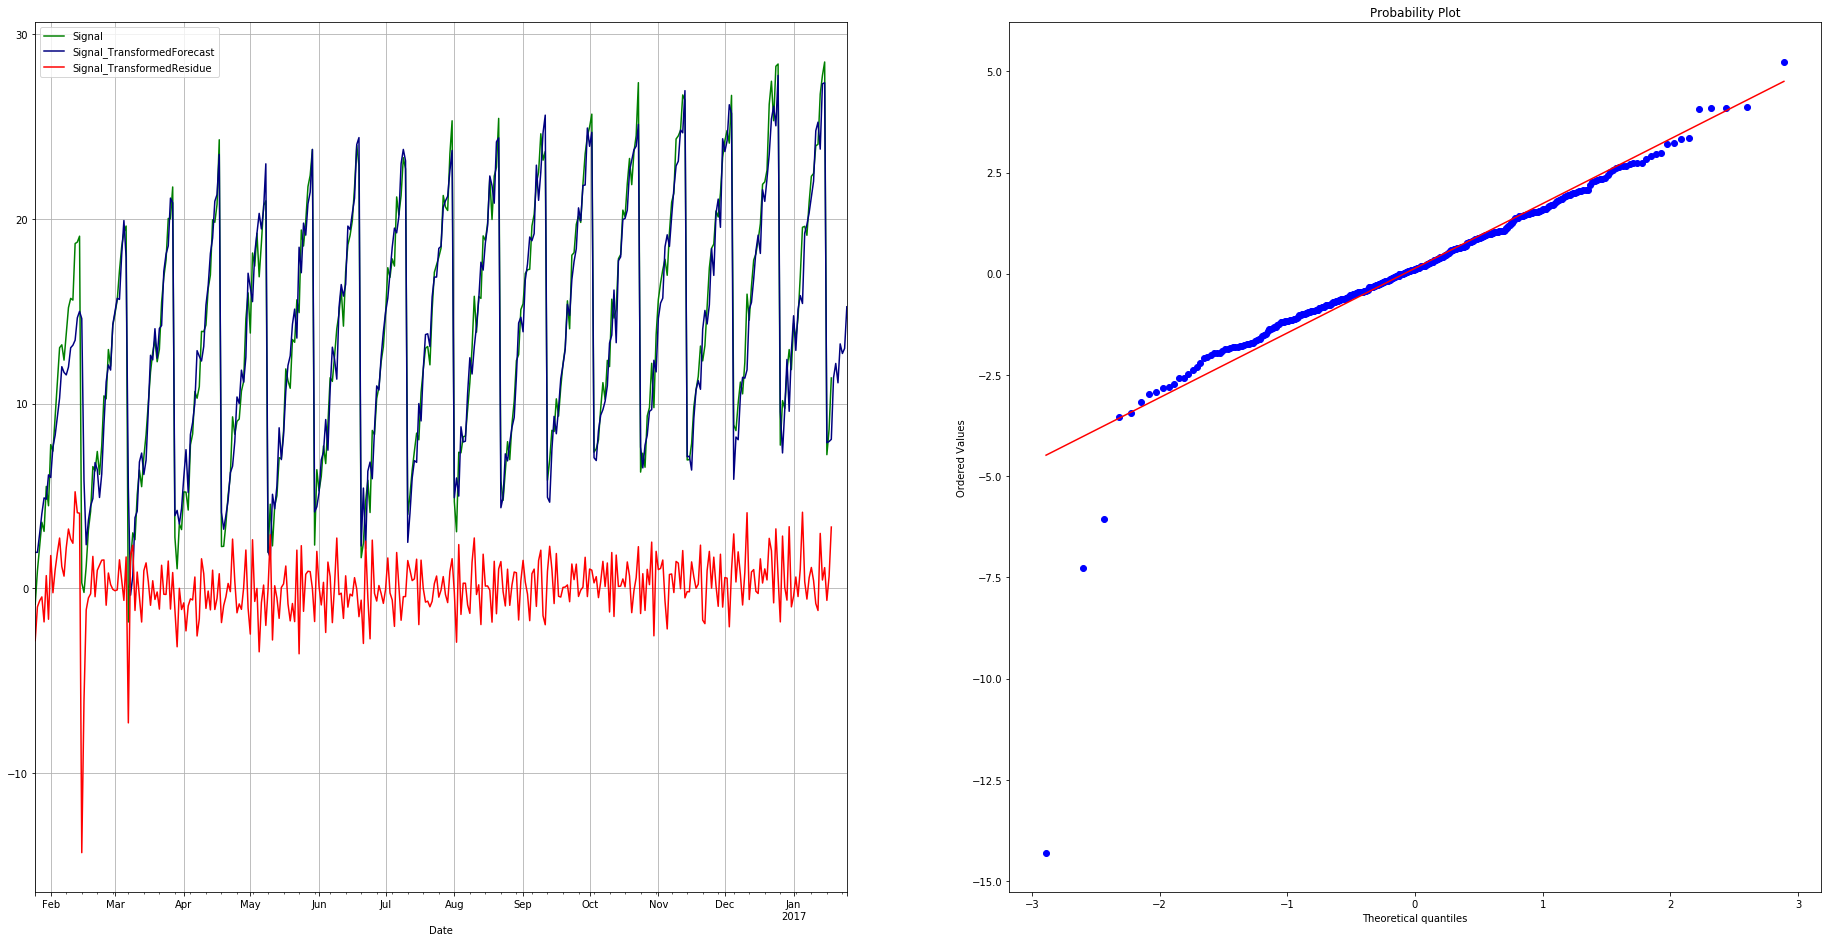

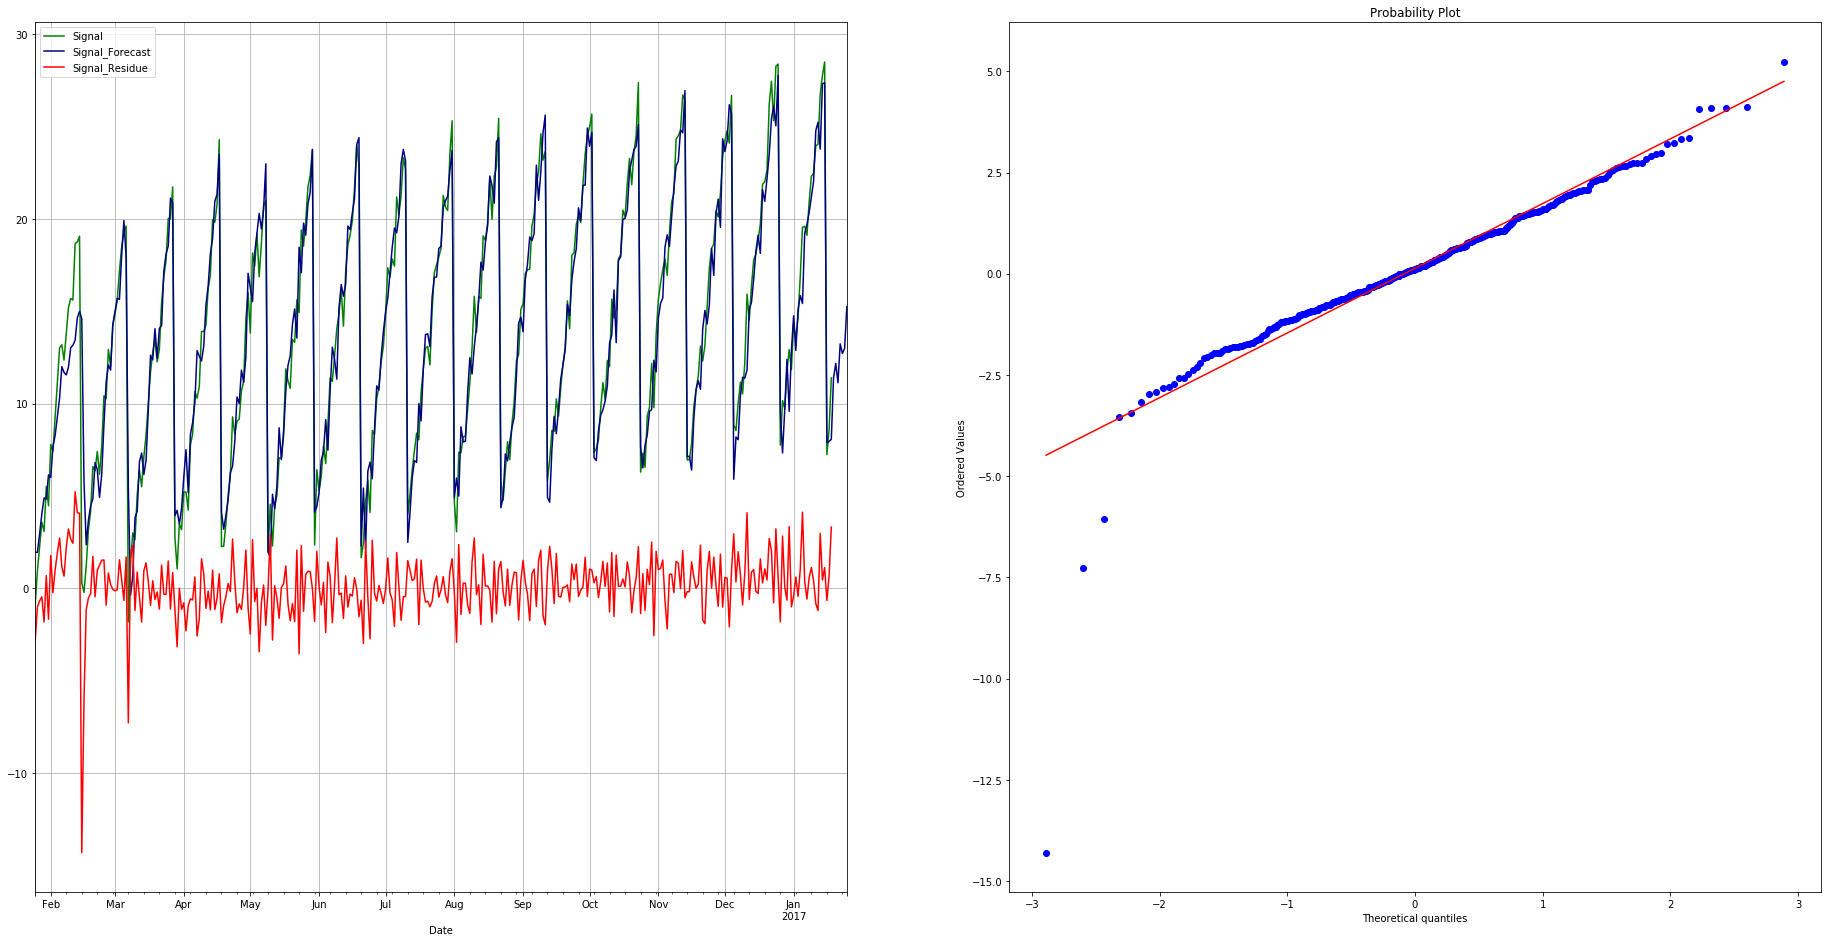

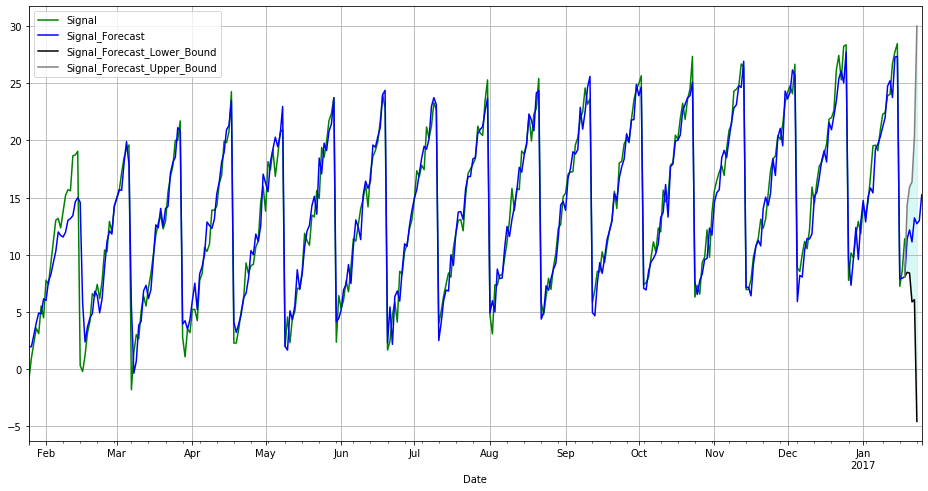

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING 'Signal'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Signal' 0.4388258457183838


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', '_Signal',
       '_Signal_ConstantTrend', '_Signal_ConstantTrend_residue',
       '_Signal_ConstantTrend_residue_zeroCycle',
       '_Signal_ConstantTrend_residue_zeroCycle_residue',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound'],
      dtype='object')
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000']
[11.39254404 12.17141899 11.12398491 13.23095585 12.7